# OVERVIEW

Created by: **Taufiq Ahmadi**;
Date: **January 06th 2025**

> Predicting 2 class, Palm Tree and other tree

> Seluruh rangkaian proses training menggunakan Google Colab dengan runtime type: "T4 - GPU"


> Using YOLOv8

> This project included counting class form palm tree or other tree.

> Using opensource dataset from Kaggle

> Dataset url: https://www.kaggle.com/datasets/riotulab/aerial-images-of-palm-trees



Here's general result:
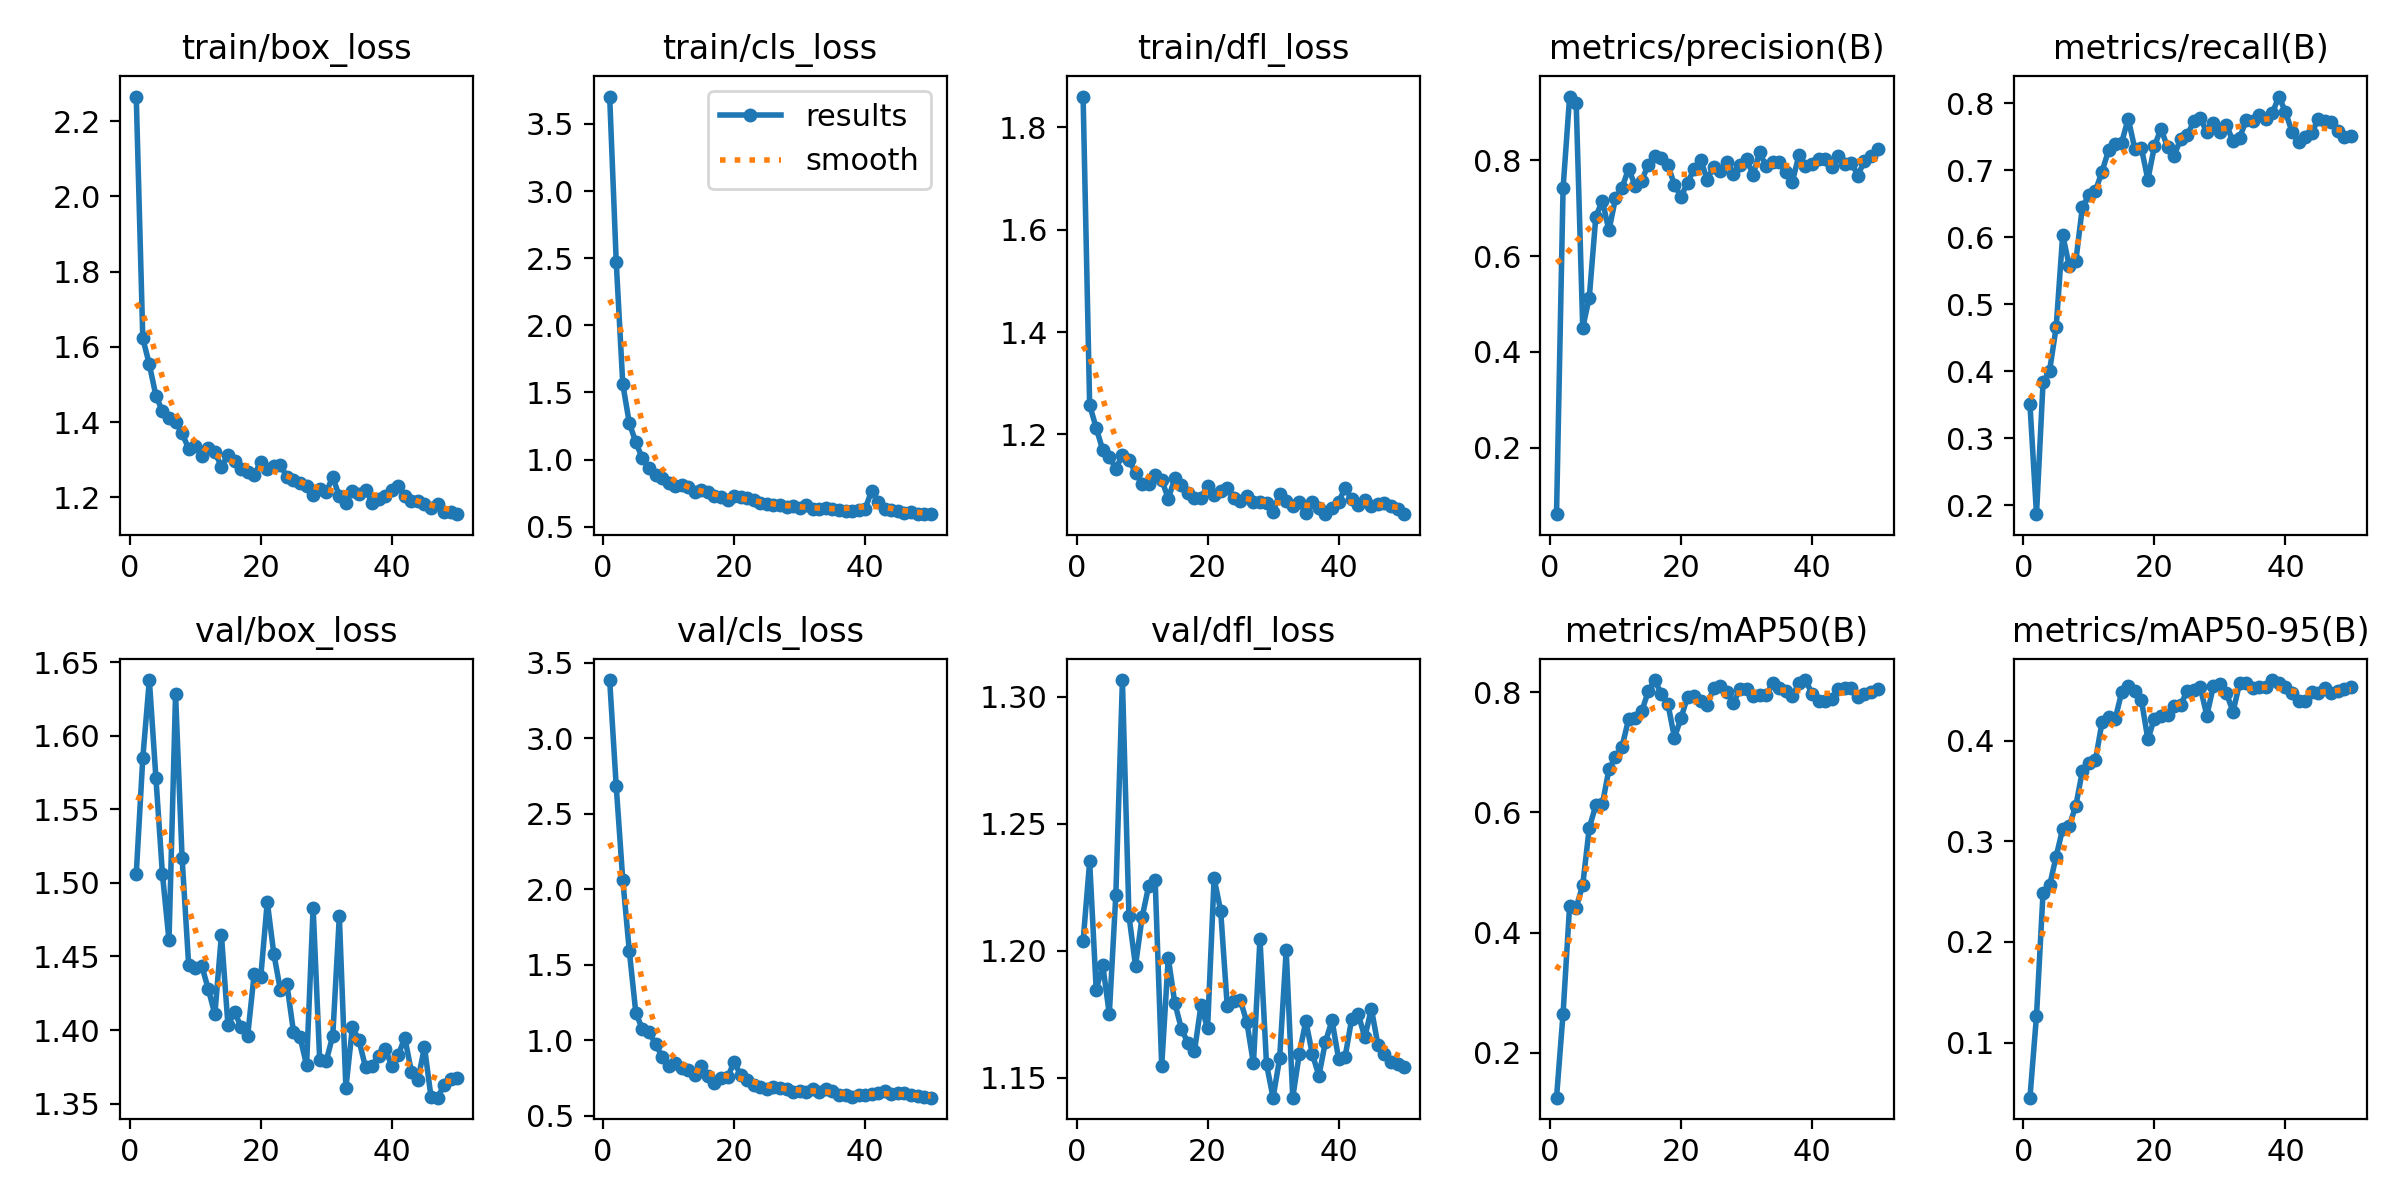

 * **Grafik "train/box_loss"** ; Mengukur kesalahan (loss) pada prediksi bounding box selama pelatihan.
 * **Grafik "train/cls_loss"** ; Mengukur kesalahan klasifikasi (class loss) selama pelatihan.
 * **Grafik "train/dfl_loss"** ; Distribution Focal Loss (DFL) adalah metrik khusus YOLO untuk memperbaiki distribusi prediksi bounding box.
 * **Grafik "metrics/precision(B)"** ; Precision mengukur seberapa baik model menghindari false positives (prediksi salah yang tidak ada di gambar)
 * **Grafik "metrics/recall(B)"** ; Recall mengukur seberapa baik model mendeteksi semua objek yang benar-benar ada (menghindari false negatives).
 * **Grafik "val/box_loss"** ; Sama seperti train/box_loss tetapi untuk data validasi.
 * **Grafik "val/cls_loss"** ; Sama seperti train/cls_loss tetapi untuk data validasi.
 * **Grafik "val/dfl_loss"** ; Sama seperti train/dfl_loss tetapi untuk data validasi.
 * **Grafik "metrics/mAP50(B)"** ; Mean Average Precision (mAP) pada threshold IOU 50% mengukur seberapa baik model mendeteksi dan mengklasifikasikan objek.
 * **Grafik "metrics/mAP50-95(B)"** ; Mean Average Precision (mAP) dihitung dari IOU 50% hingga 95%, yang lebih ketat.




# INSTALLING ALL REQUIREMENT LIBS

## Install Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


## Mencari Dataset dan Download dataset

In [ ]:
!kaggle datasets list -s "Aerial images of palm trees"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
import os
import shutil

list_file_path = ['/content/aerial-images-of-palm-trees.zip',
                  '/content/yolo_labels',
                  '/content/aerial_palm_tree',
                  '/content/yolov8n.pt']

for file_path in list_file_path:
    if os.path.exists(file_path):
        # Jika path adalah file
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"File {file_path} berhasil dihapus.")
        # Jika path adalah direktori
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
            print(f"Direktori {file_path} berhasil dihapus.")
    else:
        print(f"Path {file_path} tidak ditemukan.")


Path /content/aerial-images-of-palm-trees.zip tidak ditemukan.
Path /content/yolo_labels tidak ditemukan.
Path /content/aerial_palm_tree tidak ditemukan.
Path /content/yolov8n.pt tidak ditemukan.


In [ ]:
!kaggle datasets download -d "riotulab/aerial-images-of-palm-trees"

Dataset URL: https://www.kaggle.com/datasets/riotulab/aerial-images-of-palm-trees
License(s): unknown
100% 778M/780M [00:38<00:00, 22.6MB/s]
100% 780M/780M [00:38<00:00, 21.1MB/s]


In [ ]:
!mkdir -p aerial_palm_tree

In [ ]:
!unzip "aerial-images-of-palm-trees.zip" -d "aerial_palm_tree/"

Archive:  aerial-images-of-palm-trees.zip
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2euxc9kxgvm07486g2d5pid.jpg  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2euxc9kxgvm07486g2d5pid.xml  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2g7wdv128xl0811szdwargh.jpg  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2g7wdv128xl0811szdwargh.xml  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2g892277awc0725zbo48h3z.jpg  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2g892277awc0725zbo48h3z.xml  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2g8ivqq2flt0811ddim0vch.jpg  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2g8ivqq2flt0811ddim0vch.xml  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2gc6eaggd4m0748e86tcwvm.jpg  
  inflating: aerial_palm_tree/Palm-Counting-349images/test/ck2gc6eaggd4m0748e86tcwvm.xml  
  inflating: aerial_palm_tree/Palm-Counting-349i

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 52.4 MB/s eta 0:00:00


## Install Library YOLO

In [ ]:
from ultralytics import YOLO

# Coba memuat model YOLOv8 pre-trained
try:
    model = YOLO('yolov8n.pt')  # YOLOv8 Nano
    print("YOLOv8 is installed and working!")
except Exception as e:
    print(f"Error loading YOLOv8: {e}")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 380MB/s]

YOLOv8 is installed and working!




---



# Process

## Cek dataset

In [ ]:
import os

dataset_dir_main = 'aerial_palm_tree/Palm-Counting-349images/'
train_dir = 'train/'
test_dir = 'test/'

train_label = 'train_labels.csv'
test_label = 'test_labels.csv'

data_train = os.path.join(dataset_dir_main + train_dir)
data_test = os.path.join(dataset_dir_main + test_dir)

label_train = os.path.join(dataset_dir_main + train_label)
label_test = os.path.join(dataset_dir_main + test_label)

In [ ]:
import pandas as pd

df = pd.read_csv(label_train)
df

,filename,width,height,class,xmin,ymin,xmax,ymax
0,ck2oh0xx2sthb0838g3pmr4ky.jpg,4000,3000,Palm,1147,1694,1337,1863
1,ck2oh0xx2sthb0838g3pmr4ky.jpg,4000,3000,Palm,1392,1725,1567,1918
2,ck2oh0xx2sthb0838g3pmr4ky.jpg,4000,3000,Palm,1645,1816,1756,1933
3,ck2oh0xx2sthb0838g3pmr4ky.jpg,4000,3000,Palm,1913,1793,2104,1966
4,ck2oh0xx2sthb0838g3pmr4ky.jpg,4000,3000,Palm,2270,1817,2488,2034
...,...,...,...,...,...,...,...,...
10393,ck2glngjfjjgs0748q9owfirj.jpg,4864,3648,Tree,1967,2401,2310,2719
10394,ck2glngjfjjgs0748q9owfirj.jpg,4864,3648,Tree,2619,2528,2895,2743
10395,ck2glngjfjjgs0748q9owfirj.jpg,4864,3648,Tree,767,2344,1060,2612
10396,ck2glngjfjjgs0748q9owfirj.jpg,4864,3648,Tree,940,2883,1385,3325


In [ ]:
df['class'].unique()

array(['Palm', 'Tree'], dtype=object)

## Pre-processing Dataset

Pada dataset hanya tersedia file .XML untuk menghimpun koordinat seluruh bounding box yang ada pada satu gambar. Oleh karena itu, perlu dilakukan pengolahan terlebih dahulu.

Pada kode di bawah ini adalah proses untuk mengonversi file berformat XML pada 'data Test' menjadi format YOLO, agar dapat diproses oleh pre-trained model (YOLOv8).

In [ ]:
import os
import xml.etree.ElementTree as ET

xml_test_folder = data_test
output_folder = '/content/yolo_labels/test/'

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Mapping class names to IDs
class_mapping = {"Palm": 0, "Tree": 1}

# Fungsi untuk mengonversi koordinat bounding box ke format YOLO
def convert_to_yolo(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x_center = (box[0] + box[1]) / 2.0 * dw
    y_center = (box[2] + box[3]) / 2.0 * dh
    width = (box[1] - box[0]) * dw
    height = (box[3] - box[2]) * dh
    return x_center, y_center, width, height

# Iterasi setiap file XML
for xml_file in os.listdir(xml_test_folder):
    if not xml_file.endswith('.xml'):
        continue
    xml_path = os.path.join(xml_test_folder, xml_file)
    tree = ET.parse(xml_path)
    root = tree.getroot()

    # Ukuran gambar
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    # Nama file label (berdasarkan nama file XML)
    label_file = os.path.splitext(xml_file)[0] + '.txt'
    label_path = os.path.join(output_folder, label_file)

    # Baca semua objek dalam file XML
    with open(label_path, 'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_mapping:
                continue
            class_id = class_mapping[class_name]

            # Koordinat bounding box
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)
            box = (xmin, xmax, ymin, ymax)

            # Konversi ke format YOLO
            yolo_box = convert_to_yolo((width, height), box)
            f.write(f"{class_id} {' '.join(map(str, yolo_box))}\n")

print("Konversi selesai! Label (Test) YOLO disimpan di:", output_folder)


Konversi selesai! Label (Test) YOLO disimpan di: /content/yolo_labels/test/


Pada kode di bawah ini adalah proses untuk mengonversi file berformat XML pada 'data Train' menjadi format YOLO, agar dapat diproses oleh pre-trained model (YOLOv8).

In [ ]:
import os
import xml.etree.ElementTree as ET

xml_train_folder = data_train
output_folder = '/content/yolo_labels/train/'

# Buat folder output jika belum ada
os.makedirs(output_folder, exist_ok=True)

# Mapping class names to IDs
class_mapping = {"Palm": 0, "Tree": 1}

# Variabel untuk menyimpan nama file tanpa elemen bndbox
files_without_bndbox = []

# Fungsi untuk mengonversi koordinat bounding box ke format YOLO
def convert_to_yolo(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x_center = (box[0] + box[1]) / 2.0 * dw
    y_center = (box[2] + box[3]) / 2.0 * dh
    width = (box[1] - box[0]) * dw
    height = (box[3] - box[2]) * dh
    return x_center, y_center, width, height

# Iterasi setiap file XML
for xml_file in os.listdir(xml_train_folder):
    if not xml_file.endswith('.xml'):
        continue
    xml_path = os.path.join(xml_train_folder, xml_file)
    try:
        tree = ET.parse(xml_path)
        root = tree.getroot()
    except ET.ParseError as e:
        print(f"Error parsing XML file {xml_file}: {e}")
        continue

    # Ukuran gambar
    size = root.find('size')
    if size is None:
        print(f"Warning: 'size' not found in file {xml_file}")
        files_without_bndbox.append(xml_file)
        continue

    try:
        width = int(size.find('width').text)
        height = int(size.find('height').text)
    except AttributeError as e:
        print(f"Error reading image size in file {xml_file}: {e}")
        files_without_bndbox.append(xml_file)
        continue

    # Nama file label (berdasarkan nama file XML)
    label_file = os.path.splitext(xml_file)[0] + '.txt'
    label_path = os.path.join(output_folder, label_file)

    # Baca semua objek dalam file XML
    has_bndbox = False
    with open(label_path, 'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_mapping:
                print(f"Warning: Class '{class_name}' not in class mapping, skipping in file {xml_file}")
                continue
            class_id = class_mapping[class_name]

            # Periksa apakah elemen bndbox ada
            bndbox = obj.find('bndbox')
            if bndbox is None:
                continue

            has_bndbox = True  # Menandai bahwa file memiliki bndbox

            # Koordinat bounding box
            try:
                xmin = int(bndbox.find('xmin').text)
                ymin = int(bndbox.find('ymin').text)
                xmax = int(bndbox.find('xmax').text)
                ymax = int(bndbox.find('ymax').text)
                box = (xmin, xmax, ymin, ymax)
            except AttributeError as e:
                print(f"Error reading bounding box in file {xml_file}: {e}")
                continue

            # Konversi ke format YOLO
            yolo_box = convert_to_yolo((width, height), box)
            f.write(f"{class_id} {' '.join(map(str, yolo_box))}\n")

    # Jika file tidak memiliki elemen bndbox, tambahkan ke array
    if not has_bndbox:
        files_without_bndbox.append(xml_file)

print("Konversi selesai! Label (Train) YOLO disimpan di:", output_folder)
print("Daftar file tanpa 'bndbox':", files_without_bndbox)

Konversi selesai! Label (Train) YOLO disimpan di: /content/yolo_labels/train/
Daftar file tanpa 'bndbox': []


In [ ]:
!mkdir '/content/dataset'

In [ ]:
import os
import shutil

# Path asal dan tujuan
source_train = data_train  # Folder sumber untuk train
source_test = data_test   # Folder sumber untuk test

destination_train = '/content/dataset/train/images'  # Folder tujuan untuk train
destination_test = '/content/dataset/test/images'   # Folder tujuan untuk test

# Pastikan folder tujuan ada
os.makedirs(destination_train, exist_ok=True)
os.makedirs(destination_test, exist_ok=True)

# Fungsi untuk memindahkan file
def move_images(source_folder, destination_folder):
    for file_name in os.listdir(source_folder):
        if file_name.endswith('.jpg'):  # Hanya memindahkan file .jpg
            source_file = os.path.join(source_folder, file_name)
            destination_file = os.path.join(destination_folder, file_name)
            shutil.move(source_file, destination_file)
            print(f"Memindahkan {source_file} ke {destination_file}")

# Pindahkan file train
move_images(source_train, destination_train)

# Pindahkan file test
move_images(source_test, destination_test)

print("Semua file .jpg berhasil dipindahkan.")


Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2yaqy0ggj5m0838fz9cloym.jpg ke /content/dataset/train/images/ck2yaqy0ggj5m0838fz9cloym.jpg
Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2glngjfjjgs0748q9owfirj.jpg ke /content/dataset/train/images/ck2glngjfjjgs0748q9owfirj.jpg
Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2jbnga21qpf0944t1vyswny.jpg ke /content/dataset/train/images/ck2jbnga21qpf0944t1vyswny.jpg
Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2goiz6gofg00838lsezp8a3.jpg ke /content/dataset/train/images/ck2goiz6gofg00838lsezp8a3.jpg
Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2ohynvipnoa0748pnindxsi.jpg ke /content/dataset/train/images/ck2ohynvipnoa0748pnindxsi.jpg
Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2jeg8di488z0721lgqtsjk1.jpg ke /content/dataset/train/images/ck2jeg8di488z0721lgqtsjk1.jpg
Memindahkan aerial_palm_tree/Palm-Counting-349images/train/ck2kqyaen9wpq0794uqxelhmo.jpg

In [ ]:
import os
import shutil

# Path asal dan tujuan
source_train_labels = '/content/yolo_labels/train'
source_test_labels = '/content/yolo_labels/test'

destination_train_labels = '/content/dataset/train/labels'
destination_test_labels = '/content/dataset/test/labels'

os.makedirs(destination_train_labels, exist_ok=True)
os.makedirs(destination_test_labels, exist_ok=True)

# Fungsi untuk memindahkan file label
def move_labels(source_folder, destination_folder):
    for file_name in os.listdir(source_folder):
        if file_name.endswith('.txt')
            source_file = os.path.join(source_folder, file_name)
            destination_file = os.path.join(destination_folder, file_name)
            shutil.move(source_file, destination_file)
            print(f"Memindahkan {source_file} ke {destination_file}")

# Pindahkan file label train
move_labels(source_train_labels, destination_train_labels)

# Pindahkan file label test
move_labels(source_test_labels, destination_test_labels)

print("Semua file label (.txt) berhasil dipindahkan.")


Memindahkan /content/yolo_labels/train/ck4cfuxzc11m60870jnde6407.txt ke /content/dataset/train/labels/ck4cfuxzc11m60870jnde6407.txt
Memindahkan /content/yolo_labels/train/ck2mbvq3dwkd10838y3yslx7g.txt ke /content/dataset/train/labels/ck2mbvq3dwkd10838y3yslx7g.txt
Memindahkan /content/yolo_labels/train/ck4ch7yntlnr60822trgel8su.txt ke /content/dataset/train/labels/ck4ch7yntlnr60822trgel8su.txt
Memindahkan /content/yolo_labels/train/ck4cgul2v1sxm0706dvbtr26v.txt ke /content/dataset/train/labels/ck4cgul2v1sxm0706dvbtr26v.txt
Memindahkan /content/yolo_labels/train/ck2jbvqjh64fd0757dp7t1256.txt ke /content/dataset/train/labels/ck2jbvqjh64fd0757dp7t1256.txt
Memindahkan /content/yolo_labels/train/ck2ld344vn8oh0721lchadoac.txt ke /content/dataset/train/labels/ck2ld344vn8oh0721lchadoac.txt
Memindahkan /content/yolo_labels/train/ck2hhcmpsqkif0794rpfypn57.txt ke /content/dataset/train/labels/ck2hhcmpsqkif0794rpfypn57.txt
Memindahkan /content/yolo_labels/train/ck2jb9n3nnpc20725g7vnjwhr.txt ke /con

In [ ]:
import shutil

folder_path = '/content/yolo_labels'  # Ganti dengan path folder yang ingin dihapus

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder {folder_path} berhasil dihapus.")
else:
    print(f"Folder {folder_path} tidak ditemukan.")


Folder /content/yolo_labels berhasil dihapus.


In [ ]:
import shutil

folder_path = '/content/aerial_palm_tree'  # Ganti dengan path folder yang ingin dihapus

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)
    print(f"Folder {folder_path} berhasil dihapus.")
else:
    print(f"Folder {folder_path} tidak ditemukan.")


Folder /content/aerial_palm_tree berhasil dihapus.




---



# Modeling

## Create Config Model

Untuk memakai dataset custom, YOLOv8 harus dilakukan konfigurasi dan menyesuaikan dengan dataset yang dimiliki.

In [ ]:
dataset_yaml = """
train: /content/dataset/train/images
val: /content/dataset/test/images

nc: 2
names: ['Palm', 'Tree']
"""

with open('/content/dataset.yaml', 'w') as f:
    f.write(dataset_yaml)

print("File 'dataset.yaml' berhasil dibuat.")


File 'dataset.yaml' berhasil dibuat.


## Training Model

In [ ]:
from ultralytics import YOLO

# Load model YOLOv8 pre-trained
model = YOLO('yolov8n.pt')

# Train model
model.train(data='/content/dataset.yaml', epochs=50, imgsz=640)


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 97.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 291MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [00:00<00:00, 1498.26it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/test/labels... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 290.17it/s]

val: New cache created: /content/dataset/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.24G      2.266      3.704       1.86        899        640: 100%|██████████| 13/13 [00:19<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.60s/it]

                   all         54       2416     0.0609      0.351      0.125     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.03G      1.623      2.474      1.258        848        640: 100%|██████████| 13/13 [00:15<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         54       2416      0.742      0.186      0.265      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.5G      1.553      1.563      1.213        722        640: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         54       2416      0.933      0.383      0.445      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.31G       1.47      1.272       1.17        720        640: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         54       2416       0.92      0.401      0.442      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.27G      1.429      1.128      1.156        801        640: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         54       2416       0.45      0.466      0.479      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.16G      1.411      1.009      1.133       1164        640: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         54       2416      0.513      0.603      0.575      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.62G      1.401     0.9393       1.16        634        640: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         54       2416      0.682      0.557      0.612      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.75G       1.37     0.8845       1.15        608        640: 100%|██████████| 13/13 [00:16<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         54       2416      0.715      0.564      0.614      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.15G      1.329     0.8645      1.125        765        640: 100%|██████████| 13/13 [00:15<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         54       2416      0.653      0.645      0.672       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.11G      1.337     0.8257      1.104        919        640: 100%|██████████| 13/13 [00:17<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all         54       2416       0.72      0.663      0.692      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.44G       1.31      0.807      1.103        617        640: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         54       2416      0.742      0.669      0.709      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.56G      1.331     0.8098       1.12        646        640: 100%|██████████| 13/13 [00:16<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         54       2416      0.783      0.698      0.755      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.76G       1.32     0.7964      1.112        813        640: 100%|██████████| 13/13 [00:14<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         54       2416      0.747       0.73      0.757      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.33G      1.281     0.7603      1.074        825        640: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54       2416      0.757      0.739      0.768      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.62G      1.312     0.7751      1.114        693        640: 100%|██████████| 13/13 [00:14<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         54       2416      0.791      0.742      0.802      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       3.5G      1.297     0.7552      1.101        881        640: 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         54       2416      0.809      0.777       0.82      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.82G      1.276     0.7303      1.084        831        640: 100%|██████████| 13/13 [00:12<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         54       2416      0.805      0.732      0.797       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.45G      1.268     0.7192      1.076        999        640: 100%|██████████| 13/13 [00:13<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         54       2416      0.791      0.734      0.781      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.13G      1.259     0.7005      1.076        921        640: 100%|██████████| 13/13 [00:12<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]

                   all         54       2416      0.748      0.686      0.725      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.06G      1.295     0.7319        1.1        795        640: 100%|██████████| 13/13 [00:12<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         54       2416      0.724      0.736      0.757      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.74G      1.275     0.7211      1.082       1050        640: 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         54       2416      0.753      0.762      0.793      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.54G      1.283      0.714       1.09        816        640: 100%|██████████| 13/13 [00:14<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         54       2416      0.781      0.735      0.794      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.61G      1.285     0.7008      1.095        913        640: 100%|██████████| 13/13 [00:12<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         54       2416      0.801      0.722      0.786      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.61G      1.255     0.6762      1.075       1240        640: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         54       2416       0.76      0.747      0.779      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.38G      1.245     0.6702       1.07        893        640: 100%|██████████| 13/13 [00:14<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         54       2416      0.786      0.752      0.807      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         4G      1.238     0.6603       1.08        986        640: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         54       2416      0.778      0.773      0.811      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.64G      1.229     0.6623      1.067       1020        640: 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         54       2416      0.797      0.778      0.801      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.02G      1.205     0.6468      1.067        698        640: 100%|██████████| 13/13 [00:13<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         54       2416      0.772      0.757      0.782      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.51G      1.221     0.6562      1.066       1014        640: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         54       2416      0.791      0.771      0.805      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.75G      1.214     0.6405      1.048        974        640: 100%|██████████| 13/13 [00:13<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         54       2416      0.803      0.757      0.805      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.12G      1.254     0.6629      1.084        843        640: 100%|██████████| 13/13 [00:14<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         54       2416      0.769      0.767      0.794      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.13G      1.202     0.6328      1.071        628        640: 100%|██████████| 13/13 [00:15<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         54       2416      0.816      0.744      0.796      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.34G      1.185     0.6329       1.06       1336        640: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         54       2416      0.787      0.748      0.795      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.28G      1.218     0.6383      1.068        746        640: 100%|██████████| 13/13 [00:13<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         54       2416      0.797      0.775      0.816      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.68G      1.209     0.6314      1.046       1053        640: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.20it/s]

                   all         54       2416      0.797      0.774      0.808      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.22G       1.22     0.6263      1.068        778        640: 100%|██████████| 13/13 [00:15<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         54       2416      0.775      0.782      0.802      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.85G      1.186     0.6178      1.056        976        640: 100%|██████████| 13/13 [00:15<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         54       2416      0.755      0.777      0.793      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.73G      1.195     0.6144      1.044        888        640: 100%|██████████| 13/13 [00:15<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         54       2416       0.81      0.786      0.816       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.21G      1.203     0.6258      1.057        730        640: 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.12it/s]

                   all         54       2416      0.788       0.81       0.82      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.74G      1.221     0.6339      1.067        860        640: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.60it/s]

                   all         54       2416      0.793      0.787      0.798      0.453


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.74G       1.23     0.7691      1.096        545        640: 100%|██████████| 13/13 [00:31<00:00,  2.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         54       2416      0.803      0.758      0.786      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.67G      1.204     0.6821      1.073        353        640: 100%|██████████| 13/13 [00:15<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         54       2416      0.802      0.742      0.785       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.67G      1.191     0.6331      1.062        543        640: 100%|██████████| 13/13 [00:14<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]

                   all         54       2416      0.785      0.749      0.789      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       2.6G      1.189     0.6249      1.072        462        640: 100%|██████████| 13/13 [00:14<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         54       2416      0.809      0.756      0.806      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.71G      1.181     0.6182       1.06        587        640: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         54       2416      0.792      0.776      0.808      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.6G      1.172      0.605      1.064        408        640: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         54       2416      0.795      0.774      0.807      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.69G      1.183     0.6132      1.067        530        640: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         54       2416      0.768      0.773      0.792      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.45G      1.162     0.5972       1.06        473        640: 100%|██████████| 13/13 [00:14<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         54       2416      0.799      0.759      0.796       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.69G      1.162     0.5938      1.055        473        640: 100%|██████████| 13/13 [00:16<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         54       2416      0.808      0.751        0.8      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       2.5G      1.155     0.5944      1.045        463        640: 100%|██████████| 13/13 [00:15<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         54       2416      0.823      0.751      0.805      0.454



50 epochs completed in 0.261 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


                   all         54       2416       0.81      0.785      0.816       0.46
                  Palm         50       2175      0.925      0.944      0.971       0.61
                  Tree         30        241      0.696      0.627      0.661       0.31
Speed: 0.3ms preprocess, 2.1ms inference, 0.0ms loss, 7.5ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5107132470>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
# Evaluate model
metrics = model.val()
print(metrics)


Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/test/labels.cache... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:11<00:00,  2.86s/it]


                   all         54       2416       0.81      0.786      0.816      0.461
                  Palm         50       2175      0.925      0.945      0.971      0.611
                  Tree         30        241      0.695      0.627      0.661       0.31
Speed: 0.2ms preprocess, 8.0ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5107144040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,    

In [ ]:
results = model('/content/dataset/test/images/ck2euxc9kxgvm07486g2d5pid.jpg')  # Ganti dengan path gambar
# results.show()  # Menampilkan hasil prediksi



image 1/1 /content/dataset/test/images/ck2euxc9kxgvm07486g2d5pid.jpg: 480x640 49 Palms, 39 Trees, 7.9ms
Speed: 3.5ms preprocess, 7.9ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
results = model('/content/dataset/test/images/')  # Ganti dengan path folder
# results.save()  # Menyimpan hasil di folder output



image 1/54 /content/dataset/test/images/ck2euxc9kxgvm07486g2d5pid.jpg: 480x640 49 Palms, 39 Trees, 14.7ms
image 2/54 /content/dataset/test/images/ck2g7wdv128xl0811szdwargh.jpg: 480x640 106 Palms, 10.4ms
image 3/54 /content/dataset/test/images/ck2g892277awc0725zbo48h3z.jpg: 480x640 102 Palms, 3 Trees, 11.7ms
image 4/54 /content/dataset/test/images/ck2g8ivqq2flt0811ddim0vch.jpg: 480x640 78 Palms, 17 Trees, 9.5ms
image 5/54 /content/dataset/test/images/ck2gc6eaggd4m0748e86tcwvm.jpg: 480x640 78 Palms, 2 Trees, 9.5ms
image 6/54 /content/dataset/test/images/ck2genyal9n9c0725rwovvd0v.jpg: 480x640 55 Palms, 1 Tree, 9.8ms
image 7/54 /content/dataset/test/images/ck2gewolk9pow0725a4aef2fo.jpg: 480x640 101 Palms, 9.5ms
image 8/54 /content/dataset/test/images/ck2gh2rycjmfw07948q0ac6tw.jpg: 480x640 39 Palms, 9.5ms
image 9/54 /content/dataset/test/images/ck2gi1goojxa10794p17jnhw7.jpg: 480x640 55 Palms, 1 Tree, 9.7ms
image 10/54 /content/dataset/test/images/ck2gnv3hvqtvz0944ghfxz4ub.jpg: 480x640 32 P

AttributeError: 'list' object has no attribute 'save'

# Analyze Prediction Result

## With Bounding Box

In [ ]:
import os
from ultralytics import YOLO
from IPython.display import Image, display

model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

input_folder = '/content/dataset/test/images/'
output_folder = '/content/dataset/test/results/'
os.makedirs(output_folder, exist_ok=True)

for img_file in os.listdir(input_folder):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        input_path = os.path.join(input_folder, img_file)
        output_path = os.path.join(output_folder, img_file)

        results = model(input_path)
        result_image = results[0].plot()

        results[0].save(output_path)
        print(f"Hasil prediksi disimpan di: {output_path}")

sample_result = os.path.join(output_folder, os.listdir(output_folder)[0])
display(Image(filename=sample_result))


Output hidden; open in https://colab.research.google.com to view.

## Generate Report File XLSX

In [ ]:
import os
from ultralytics import YOLO
import pandas as pd

model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

input_folder = '/content/dataset/test/images/'

results_data = []

for img_file in os.listdir(input_folder):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        input_path = os.path.join(input_folder, img_file)

        results = model(input_path)

        class_counts = {}
        for box in results[0].boxes.data:
            class_id = int(box[-1].item())
            class_counts[class_id] = class_counts.get(class_id, 0) + 1

        for class_id, count in class_counts.items():
            results_data.append({
                'nama_gambar': img_file,
                'class': model.names[class_id],
                'sum_class': count
            })

output_excel_path = '/content/prediction_summary.xlsx'
df = pd.DataFrame(results_data)
df.to_excel(output_excel_path, index=False)

print(f"Hasil prediksi per gambar disimpan di: {output_excel_path}")



image 1/1 /content/dataset/test/images/ck2qi5sopq5cj0944wgovvvn4.jpg: 480x640 73 Palms, 18 Trees, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/test/images/ck2slr0epzeac07482v6aco6g.jpg: 480x640 52 Palms, 6.5ms
Speed: 2.8ms preprocess, 6.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/test/images/ck2nh1sma2w7r0725f0tmhwr6.jpg: 480x640 48 Palms, 37.3ms
Speed: 9.2ms preprocess, 37.3ms inference, 7.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/test/images/ck2gc6eaggd4m0748e86tcwvm.jpg: 480x640 78 Palms, 2 Trees, 10.5ms
Speed: 3.2ms preprocess, 10.5ms inference, 2.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /content/dataset/test/images/ck2mc2cge3q1i0757y9mgoctb.jpg: 480x640 35 Palms, 24 Trees, 13.1ms
Speed: 4.3ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1

## Bounding Box + Counting Class

In [ ]:
import os
from ultralytics import YOLO
import cv2
import numpy as np

model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

input_folder = '/content/dataset/test/images/'
output_folder = '/content/dataset/test/results_with_count/'
os.makedirs(output_folder, exist_ok=True)

for img_file in os.listdir(input_folder):
    if img_file.endswith(('.jpg', '.png', '.jpeg')):
        input_path = os.path.join(input_folder, img_file)
        output_path = os.path.join(output_folder, img_file)

        results = model(input_path)

        class_counts = {}
        for box in results[0].boxes.data:
            class_id = int(box[-1].item())
            class_counts[class_id] = class_counts.get(class_id, 0) + 1

        result_image = results[0].plot()

        overlay = np.copy(result_image)
        y_offset = 20
        for class_id, count in class_counts.items():
            class_name = model.names[class_id]
            text = f"{class_name}: {count}"
            cv2.putText(
                overlay,
                text,
                (10, y_offset),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 0),
                2,
                cv2.LINE_AA
            )
            y_offset += 25

        cv2.imwrite(output_path, overlay)
        print(f"Hasil prediksi disimpan di: {output_path}")



image 1/1 /content/dataset/test/images/ck2qi5sopq5cj0944wgovvvn4.jpg: 480x640 73 Palms, 18 Trees, 7.7ms
Speed: 3.2ms preprocess, 7.7ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Hasil prediksi disimpan di: /content/dataset/test/results_with_count/ck2qi5sopq5cj0944wgovvvn4.jpg

image 1/1 /content/dataset/test/images/ck2slr0epzeac07482v6aco6g.jpg: 480x640 52 Palms, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Hasil prediksi disimpan di: /content/dataset/test/results_with_count/ck2slr0epzeac07482v6aco6g.jpg

image 1/1 /content/dataset/test/images/ck2nh1sma2w7r0725f0tmhwr6.jpg: 480x640 48 Palms, 6.9ms
Speed: 3.0ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Hasil prediksi disimpan di: /content/dataset/test/results_with_count/ck2nh1sma2w7r0725f0tmhwr6.jpg

image 1/1 /content/dataset/test/images/ck2gc6eaggd4m0748e86tcwvm.jpg: 480x640 78 Palms, 2 Trees, 6.8ms
Speed: 3.4ms pre

# Generate requirements.txt for listing all library

In [ ]:
!pip freeze

In [ ]:
!pip freeze > requirements.txt